In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [4]:
df = pd.read_csv('../fluorine/resources/extinction/dlc/60min_x1_1h_EXT_4.csv', header=[1,2], index_col=[0])
df

bodyparts        nose                            leftear              \
coords              x           y likelihood           x           y   
0          123.177933  148.879150   1.000000  113.995659  141.496323   
1          119.410202  152.170044   1.000000  112.932144  143.873062   
2          118.135941  161.516739   1.000000  111.886093  149.028061   
3          117.793068  157.796768   1.000000  111.784340  147.730591   
4          119.346191  155.453873   1.000000  111.508095  145.412430   
...               ...         ...        ...         ...         ...   
7196        43.648617  175.638657   0.206869   53.391884  179.173569   
7197       119.626884  183.198486   0.000065   33.376663  190.351974   
7198        10.302654  188.220428   0.101459   25.063175  194.094040   
7199        17.831781  202.222992   0.000020   28.829458  200.954834   
7200        52.409401  200.202988   0.000148   54.249134  194.154221   

bodyparts               rightear                               neck  ...  \
coords    likelihood           x           y likelihood           x  ...   
0                1.0  108.802361  152.560562   1.000000  109.415627  ...   
1                1.0  105.397881  154.381973   1.000000  107.673691  ...   
2                1.0  101.260460  156.166855   1.000000  105.630119  ...   
3                1.0  101.725777  155.244247   1.000000  105.482697  ...   
4                1.0  102.443932  154.970657   1.000000  106.509781  ...   
...              ...         ...         ...        ...         ...  ...   
7196             1.0   45.077557  171.047623   1.000000   50.065140  ...   
7197             1.0   24.178202  183.056763   1.000000   30.136538  ...   
7198             1.0   14.711369  183.276184   1.000000   22.952438  ...   
7199             1.0   15.605181  191.681091   1.000000   25.128241  ...   
7200             1.0   42.951454  193.109543   0.999996   49.590649  ...   

bodyparts      tail1       tail2                              tail3  \
coords    likelihood           x           y likelihood           x   
0                1.0   59.791824  117.849159   1.000000   48.369423   
1                1.0   60.108246  117.899796   1.000000   48.555641   
2                1.0   60.013668  117.001038   1.000000   48.622112   
3                1.0   60.036045  116.740471   1.000000   48.592777   
4                1.0   60.242599  116.857292   1.000000   48.784065   
...              ...         ...         ...        ...         ...   
7196             1.0  117.997498  176.347092   0.999999  132.978149   
7197             1.0   94.359428  167.454803   1.000000  110.193336   
7198             1.0   90.768867  160.745285   1.000000  109.224411   
7199             1.0   94.063049  157.260483   1.000000  113.425171   
7200             1.0   90.226227  145.005142   1.000000  109.183289   

bodyparts                              tail4                         
coords              y likelihood           x           y likelihood  
0          111.204178   1.000000   46.848885   97.373825   1.000000  
1          111.330940   1.000000   46.879013   97.327644   1.000000  
2          110.696136   1.000000   46.685303   97.290222   1.000000  
3          110.639336   1.000000   46.699959   97.177841   1.000000  
4          110.768616   1.000000   46.731392   97.168236   1.000000  
...               ...        ...         ...         ...        ...  
7196       190.208160   0.999805  158.128006  196.664154   0.081993  
7197       178.727890   1.000000  122.175621  188.583557   0.999178  
7198       167.892517   1.000000  127.835907  173.875366   0.999997  
7199       161.990982   1.000000  132.631012  168.353409   1.000000  
7200       145.615814   1.000000  129.620651  149.024551   1.000000  

[7201 rows x 36 columns]

In [6]:
def convert_polar_df(xy_df):
    body_parts = xy_df.columns.get_level_values(0).unique(0).to_list()
    iterables = [body_parts, ['distance', 'theta']]
    columns = pd.MultiIndex.from_product(iterables, names=['bodyparts', 'coords'])
    polar_df = pd.DataFrame(columns=columns)
    
    left_ear_x = xy_df.loc[:, ('leftear', 'x')]
    left_ear_y = xy_df.loc[:, ('leftear', 'y')]
    
    right_ear_x = xy_df.loc[:, ('rightear', 'x')]
    right_ear_y = xy_df.loc[:, ('rightear', 'y')]
    
    center_ear_x = (left_ear_x + right_ear_x) / 2.0
    center_ear_y = (left_ear_y + right_ear_y) / 2.0
    
    for body_part in body_parts:
        x = xy_df.loc[:, (body_part, 'x')]
        y = xy_df.loc[:, (body_part, 'y')]
        
        diff_x = center_ear_x - x
        diff_y = center_ear_y - y
        distance = np.sqrt(diff_x**2 + diff_y**2)
        theta = np.arctan2(diff_x, diff_y)
        
        polar_df.loc[:, (body_part, 'distance')] = distance
        polar_df.loc[:, (body_part, 'theta')] = theta
        
    return polar_df

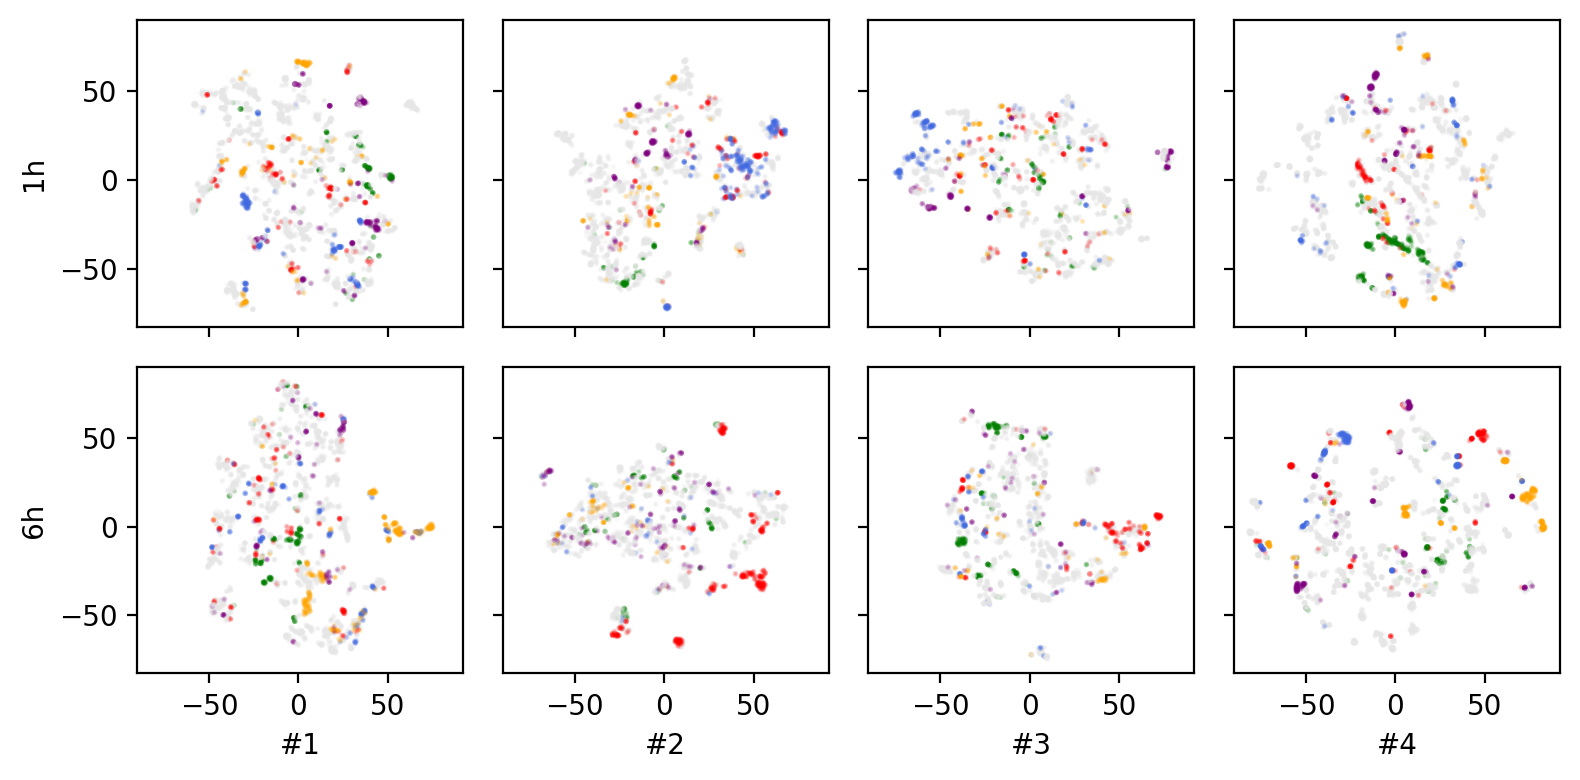

In [7]:
intervals = ['1h', '6h']
count = 4

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4), dpi=200, tight_layout=True, sharey=True, sharex=True)

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        ax = axes[interval_index][number - 1]
        filepath = '../fluorine/resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        bodyparts = list(set([body for (body, value) in df.columns]))
        drop_columns = [(body, 'likelihood') for body in bodyparts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        polar_df = convert_polar_df(df)
            
        xy = pd.read_csv('../fluorine/resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
        freezing_index = xy[xy['FZ'] == 1].index
        freezing_df = polar_df.iloc[freezing_index, :]
        freezing_df
        
        tsne = TSNE(n_components=2)
        x_embedded = tsne.fit_transform(freezing_df.to_numpy())
        x_embedded
        
        x, y = zip(*x_embedded)
        
        size = len(df)
        
        index_series = pd.Series(freezing_df.index)
        freezing_size = len(index_series[index_series <= 360])
        sleeping_size = len(index_series[index_series > 360])
        colors = ['green'] * freezing_size + ['0.9'] * sleeping_size
        colors = ['red' if df_index >= 5040 and df_index < 5400 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['royalblue' if df_index >= 5400 and df_index < 5760 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['orange' if df_index >= 5760 and df_index < 6120 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['purple' if df_index >= 6120 and df_index < 6480 else colors[i] for i, df_index in enumerate(index_series)]

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.2)
        
        if number == 1:
            ax.set_ylabel(interval)
        if interval == '6h':
            ax.set_xlabel('#%d' % number)
plt.show()